# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from datetime import datetime
import time

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Define URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q="

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [25]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Build partial query URL
query_url = base_url + "&appid=" + weather_api_key


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"city": city, 
                          "lat": city_lat, 
                          "lng": city_lng, 
                          "max_Temp": city_max_temp,
                          "humidity": city_humidity,
                          "cloudiness": city_clouds,
                          "wind_Speed": city_wind,
                          "country": city_country,
                          "date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinkat
City not found. Skipping...
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | tarrafal
Processing Record 5 of Set 1 | sobolevo
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | spas-klepiki
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | tucuma
Processing Record 10 of Set 1 | dwarka
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | umba
Processing Record 13 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | manokwari
Processing Record 16 of Set 1 | alappuzha
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | jaslo
Processing Record 21 of Set 1 | qaanaaq


Processing Record 35 of Set 4 | mount gambier
Processing Record 36 of Set 4 | moanda
Processing Record 37 of Set 4 | mayenne
Processing Record 38 of Set 4 | moyale
Processing Record 39 of Set 4 | rocha
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | humenne
Processing Record 43 of Set 4 | suruc
Processing Record 44 of Set 4 | zalantun
Processing Record 45 of Set 4 | sabha
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | cayenne
Processing Record 48 of Set 4 | broken hill
Processing Record 49 of Set 4 | noceto
Processing Record 0 of Set 5 | cidreira
Processing Record 1 of Set 5 | puerto escondido
Processing Record 2 of Set 5 | atambua
Processing Record 3 of Set 5 | narsaq
Processing Record 4 of Set 5 | karakulino
Processing Record 5 of Set 5 | voi
Processing Record 6 of Set 5 | san cristobal
Processing Record 7 of Set 5 | baykit
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of

Processing Record 27 of Set 8 | aguimes
Processing Record 28 of Set 8 | gao
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | akyab
Processing Record 31 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 32 of Set 8 | maneadero
Processing Record 33 of Set 8 | san gabriel
Processing Record 34 of Set 8 | fairview
Processing Record 35 of Set 8 | zima
Processing Record 36 of Set 8 | burnie
Processing Record 37 of Set 8 | domoni
Processing Record 38 of Set 8 | jamsa
Processing Record 39 of Set 8 | cherskiy
Processing Record 40 of Set 8 | katima mulilo
Processing Record 41 of Set 8 | paita
Processing Record 42 of Set 8 | boende
Processing Record 43 of Set 8 | ronnede
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | gat
Processing Record 46 of Set 8 | costa rica
Processing Record 47 of Set 8 | quatre cocos
Processing Record 48 of Set 8 | banda aceh
Processing Record 49 of Set 8 | touho
Processing Record 0 of Set 9 | alihe
Processing Re

Processing Record 12 of Set 12 | verkhoyansk
Processing Record 13 of Set 12 | bandarbeyla
Processing Record 14 of Set 12 | oktyabrskiy
Processing Record 15 of Set 12 | mundargi
Processing Record 16 of Set 12 | jaca
Processing Record 17 of Set 12 | beberibe
Processing Record 18 of Set 12 | murray bridge
Processing Record 19 of Set 12 | gladstone
Processing Record 20 of Set 12 | kala nera
Processing Record 21 of Set 12 | tuatapere
Processing Record 22 of Set 12 | puerto narino
Processing Record 23 of Set 12 | escanaba
Processing Record 24 of Set 12 | wittingen
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | broome
Processing Record 27 of Set 12 | isangel
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | salamanca
Processing Record 30 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 31 of Set 12 | plettenberg bay
Processing Record 32 of Set 12 | amahai
Processing Record 33 of Set 12 | thung song
Processing Record

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

city          554
lat           554
lng           554
max_Temp      554
humidity      554
cloudiness    554
wind_Speed    554
country       554
date          554
dtype: int64

In [30]:
# Display sample data
city_data_df.head(15)

,city,lat,lng,max_Temp,humidity,cloudiness,wind_Speed,country,date
0,puerto ayora,-0.7393,-90.3518,75.54,100,97,7.00,EC,2023-04-17 03:57:12
1,tarrafal,15.2833,-23.7667,74.19,87,76,15.32,CV,2023-04-17 03:57:13
2,sobolevo,54.4299,31.8996,41.95,93,100,4.88,RU,2023-04-17 03:57:13
3,dikson,73.5069,80.5464,5.99,99,100,11.07,RU,2023-04-17 03:57:13
4,spas-klepiki,55.1347,40.1767,42.46,48,100,3.65,RU,2023-04-17 03:57:14
5,namibe,-15.1961,12.1522,75.29,80,20,2.93,AO,2023-04-17 03:54:19
6,tucuma,-0.1833,-50.0500,75.29,92,98,3.89,BR,2023-04-17 03:57:14
7,dwarka,22.2394,68.9678,82.67,68,0,8.77,IN,2023-04-17 03:57:15
8,port alfred,-33.5906,26.8910,63.97,51,5,5.10,ZA,2023-04-17 03:57:15
9,umba,66.6871,34.3429,27.12,94,100,3.94,RU,2023-04-17 03:57:15


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/juliencounts/Desktop/Data_Analysis/API/WeatherPy/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/API/WeatherPy/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,city,lat,lng,max_Temp,humidity,cloudiness,wind_Speed,country,date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,75.54,100,97,7.00,EC,2023-04-17 03:57:12
1,tarrafal,15.2833,-23.7667,74.19,87,76,15.32,CV,2023-04-17 03:57:13
2,sobolevo,54.4299,31.8996,41.95,93,100,4.88,RU,2023-04-17 03:57:13
3,dikson,73.5069,80.5464,5.99,99,100,11.07,RU,2023-04-17 03:57:13
4,spas-klepiki,55.1347,40.1767,42.46,48,100,3.65,RU,2023-04-17 03:57:14


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

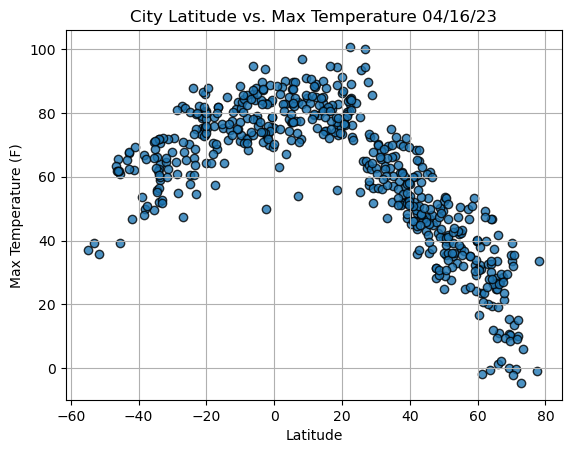

In [38]:
#This is me building the data I need for the scatterplots
lats = city_data_df["lat"]
max_temps = city_data_df["max_Temp"]
humidity = city_data_df["humidity"]
cloudiness = city_data_df["cloudiness"]
wind_speed = city_data_df["wind_Speed"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/juliencounts/Desktop/Data_Analysis/API/WeatherPy/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

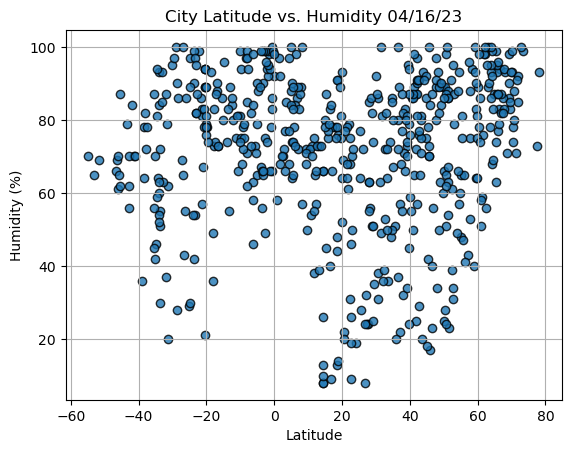

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/juliencounts/Desktop/Data_Analysis/API/WeatherPy/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

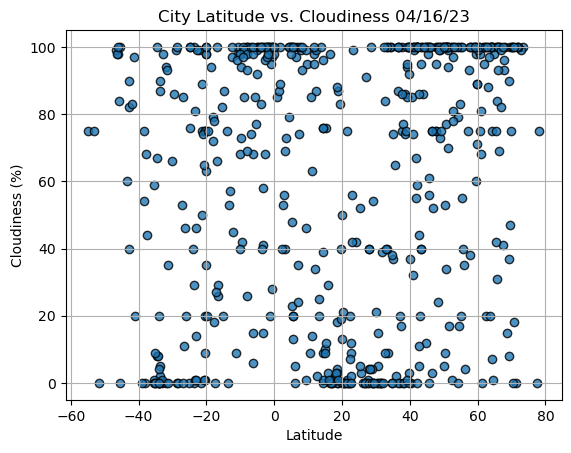

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/juliencounts/Desktop/Data_Analysis/API/WeatherPy/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

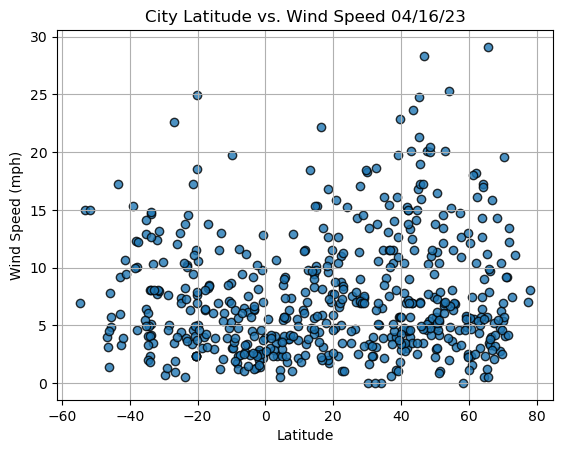

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/juliencounts/Desktop/Data_Analysis/API/WeatherPy/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["lat"] >= 0)] 

# Display sample data
northern_hemi_df.head()

,city,lat,lng,max_Temp,humidity,cloudiness,wind_Speed,country,date
City_ID,,,,,,,,,
1,tarrafal,15.2833,-23.7667,74.19,87,76,15.32,CV,2023-04-17 03:57:13
2,sobolevo,54.4299,31.8996,41.95,93,100,4.88,RU,2023-04-17 03:57:13
3,dikson,73.5069,80.5464,5.99,99,100,11.07,RU,2023-04-17 03:57:13
4,spas-klepiki,55.1347,40.1767,42.46,48,100,3.65,RU,2023-04-17 03:57:14
7,dwarka,22.2394,68.9678,82.67,68,0,8.77,IN,2023-04-17 03:57:15


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,city,lat,lng,max_Temp,humidity,cloudiness,wind_Speed,country,date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,75.54,100,97,7.00,EC,2023-04-17 03:57:12
5,namibe,-15.1961,12.1522,75.29,80,20,2.93,AO,2023-04-17 03:54:19
6,tucuma,-0.1833,-50.0500,75.29,92,98,3.89,BR,2023-04-17 03:57:14
8,port alfred,-33.5906,26.8910,63.97,51,5,5.10,ZA,2023-04-17 03:57:15
10,new norfolk,-42.7826,147.0587,67.50,62,90,5.99,AU,2023-04-17 03:57:16


###  Temperature vs. Latitude Linear Regression Plot

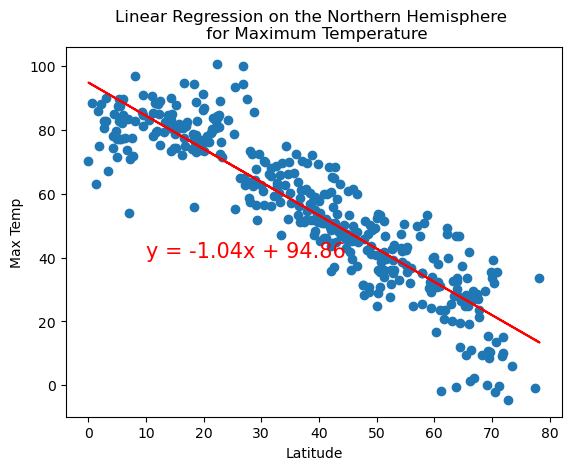

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["max_Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

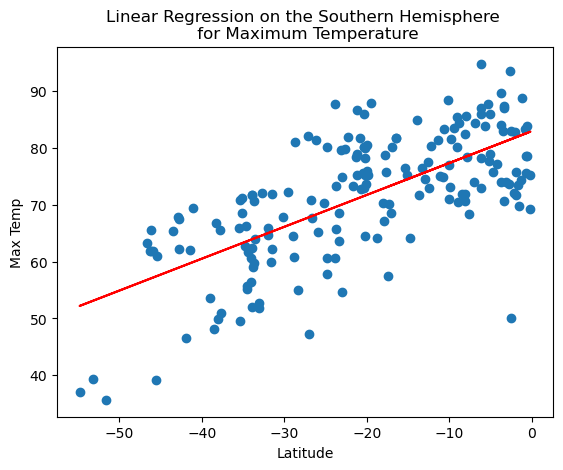

In [59]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["max_Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

**Discussion about the linear relationship:** There is a clearly negative relationship between latitute and maximum temperature in the Northern Hemisphere, while there is a moderately positive relationship between latitude and max temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

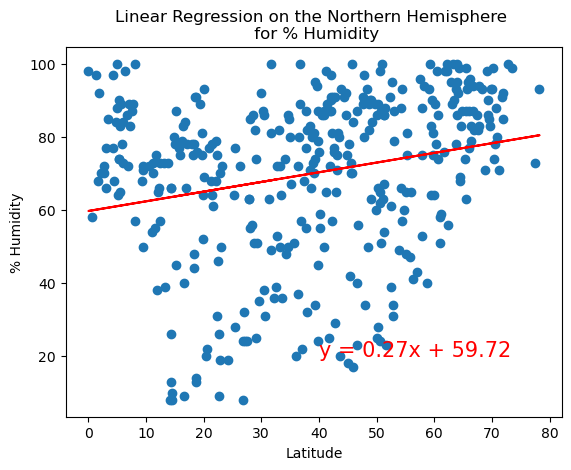

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

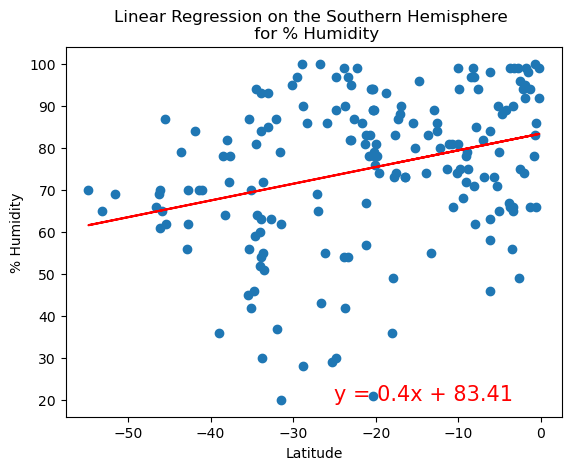

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

**Discussion about the linear relationship:** There is a positive relationship between latitude and percentage humidity in both the Northern and Southern hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

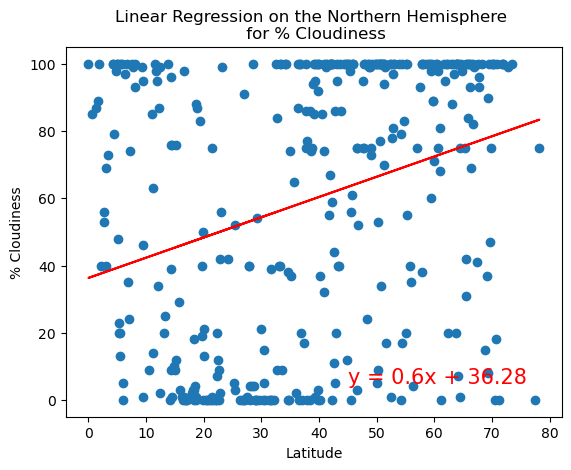

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["cloudiness"]
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

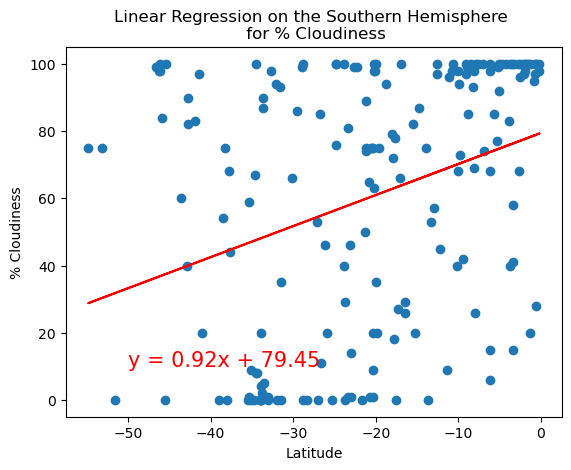

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["cloudiness"]
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

**Discussion about the linear relationship:** There is a consistently positive relationship between latitude and percentage cloudiness in both the Northern and Southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

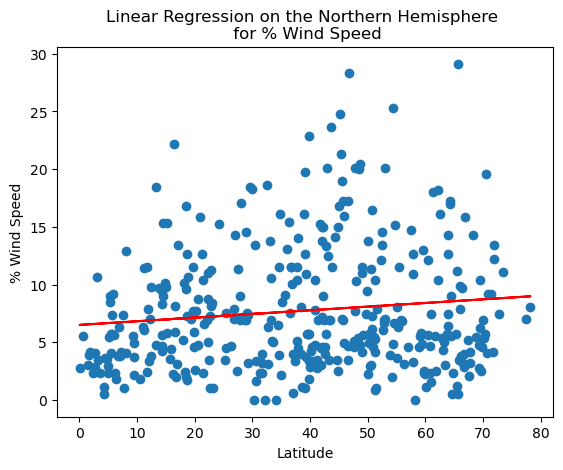

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["wind_Speed"]
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

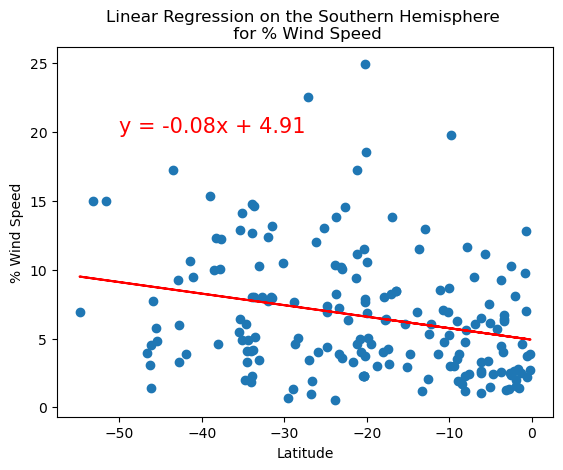

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["wind_Speed"]
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))

**Discussion about the linear relationship:** In the Northern Hemisphere there is a weakly positive relationship between latitude and the percentage wind speed. In the Southern Hemisphere there is a weakly negative relationship between latitutde and the percentage wind speed.